In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [3]:
data= pd.read_csv("customer_churn.csv")

In [4]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
data.T.head(22)

,0,1,2,3,4,5,6,7,8,9,...,7033,7034,7035,7036,7037,7038,7039,7040,7041,7042
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU,9305-CDSKC,1452-KIOVK,6713-OKOMC,7892-POOKP,6388-TABGU,...,9767-FFLEM,0639-TSIQW,8456-QDAVC,7750-EYXWZ,2569-WGERO,6840-RESVB,2234-XADUH,4801-JZAZL,8361-LTMKD,3186-AJIEK
gender,Female,Male,Male,Male,Female,Female,Male,Female,Female,Male,...,Male,Female,Male,Female,Female,Male,Female,Female,Male,Male
SeniorCitizen,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
Partner,Yes,No,No,No,No,No,No,No,Yes,No,...,No,No,No,No,No,Yes,Yes,Yes,Yes,No
Dependents,No,No,No,No,No,No,Yes,No,No,Yes,...,No,No,No,No,No,Yes,Yes,Yes,No,No
tenure,1,34,2,45,2,8,22,10,28,62,...,38,67,19,12,72,24,72,11,4,66
PhoneService,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Yes,...,Yes,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Yes
MultipleLines,No phone service,No,No,No phone service,No,Yes,Yes,No phone service,Yes,No,...,No,Yes,No,No phone service,No,Yes,Yes,No phone service,Yes,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic,Fiber optic,Fiber optic,DSL,Fiber optic,DSL,...,Fiber optic,Fiber optic,Fiber optic,DSL,No,DSL,Fiber optic,DSL,Fiber optic,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No,No,No,Yes,No,Yes,...,No,Yes,No,No,No internet service,Yes,No,Yes,No,Yes


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [14]:
data['Churn'].value_counts(dropna=False)

No     5174
Yes    1869
Name: Churn, dtype: int64

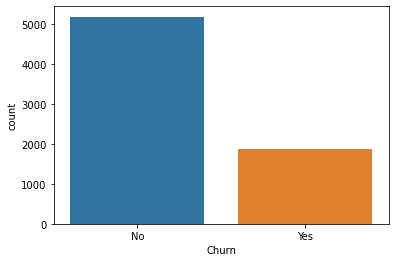

In [18]:
sns.countplot(x='Churn', data=data);
plt.show()

In [34]:
data['Churn'] = data['Churn'].replace(to_replace = ['Yes', 'No'], value = [1, 0])
data['Churn'].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [35]:
#We will try to predict variable Churn using a logistic regression on variables tenure, SeniorCitizen,MonthlyCharges.


X = data[['tenure','SeniorCitizen','MonthlyCharges']]
y = data['Churn']
X.head()


,tenure,SeniorCitizen,MonthlyCharges
0,1,0,29.85
1,34,0,56.95
2,2,0,53.85
3,45,0,42.30
4,2,0,70.70


In [36]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

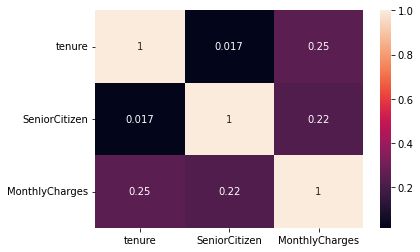

In [37]:
correlations_matrix = X.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0) 

In [39]:
y_train.isna().sum()
y_test.isna().sum()

0

In [40]:
transformer = StandardScaler()
transformer.fit(X_train)
X_train_scaled_np = transformer.transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled_np, columns=X.columns)

X_test_scaled_np = transformer.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled_np , columns=X.columns)
X_train_scaled.head()

,tenure,SeniorCitizen,MonthlyCharges
0,-0.340191,-0.435476,-0.514314
1,0.883210,2.296336,0.017840
2,-1.196572,-0.435476,-0.819594
3,1.168670,-0.435476,-1.483535
4,-0.829552,-0.435476,0.658427


In [41]:
y_train.head()

3296    0
6397    0
6043    1
5309    0
3000    1
Name: Churn, dtype: int64

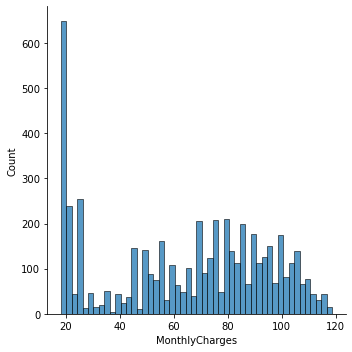

In [28]:
sns.displot(x = "MonthlyCharges", data = X_train, bins = 50)
plt.show()

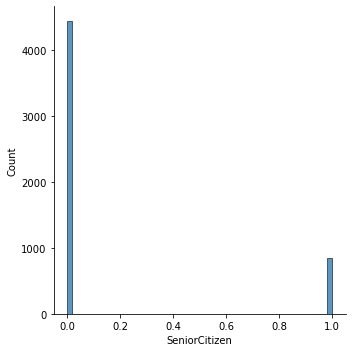

In [29]:
sns.displot(x = "SeniorCitizen", data = X_train, bins = 50)
plt.show()

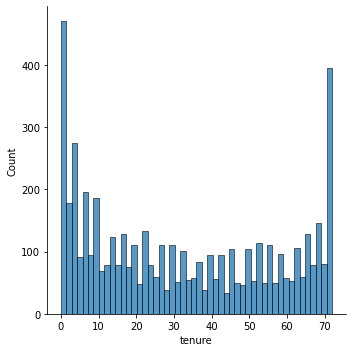

In [30]:
sns.displot(x = "tenure", data = X_train, bins = 50)
plt.show()

In [42]:
data['Churn'] = data['Churn'].replace(to_replace = ['Yes', 'No'], value = [1, 0])
data['Churn'].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [43]:
y_train.head()

3296    0
6397    0
6043    1
5309    0
3000    1
Name: Churn, dtype: int64

In [44]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=0, solver='lbfgs')
lr.fit(X_train_scaled, y_train)

LogisticRegression(random_state=0)

In [45]:
lr.predict_proba(X_train_scaled)

array([[0.83055757, 0.16944243],
       [0.88959148, 0.11040852],
       [0.66558189, 0.33441811],
       ...,
       [0.98794797, 0.01205203],
       [0.25884511, 0.74115489],
       [0.79626532, 0.20373468]])

In [46]:
lr.predict_proba(X_train_scaled)[0,0] + lr.predict_proba(X_train_scaled)[0,1]

1.0

In [47]:
lr.predict_proba(X_train_scaled).sum(axis=1).shape

(5282,)

In [48]:
lr.predict_proba(X_train_scaled).sum(axis=1)

array([1., 1., 1., ..., 1., 1., 1.])

In [49]:
logits = np.log(lr.predict_proba(X_train_scaled)[:,1]/(1-lr.predict_proba(X_train_scaled)[:,1])) 

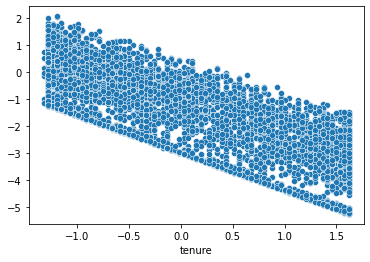

In [50]:
sns.scatterplot(y = logits,x = X_train_scaled['tenure']);
plt.show()

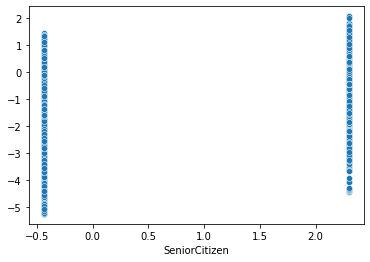

In [51]:
sns.scatterplot(y = logits,x = X_train_scaled['SeniorCitizen']);
plt.show()

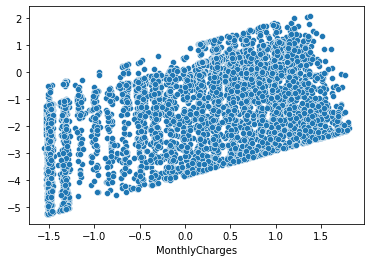

In [52]:
sns.scatterplot(y = logits,x = X_train_scaled['MonthlyCharges']);
plt.show()

In [54]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score

In [55]:
y_pred_test = lr.predict(X_test_scaled)

print("The accuracy in the TEST set is: {:.2f}".format(accuracy_score(y_test,y_pred_test)))
print("The precision in the TEST set is: {:.2f}".format(precision_score(y_test,y_pred_test)))
print("The recall in the TEST set is: {:.2f}".format(recall_score(y_test,y_pred_test)))
print("The F1 in the TEST set is: {:.2f}".format(f1_score(y_test,y_pred_test)))
print("The Kappa in the TEST set is: {:.2f}".format(cohen_kappa_score(y_test,y_pred_test)))

The accuracy in the TEST set is: 0.78
The precision in the TEST set is: 0.61
The recall in the TEST set is: 0.46
The F1 in the TEST set is: 0.52
The Kappa in the TEST set is: 0.38


In [56]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

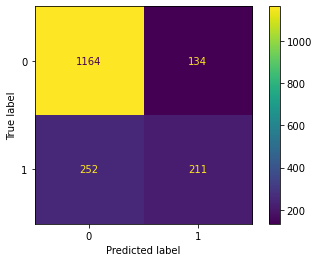

In [57]:
cm_test = confusion_matrix(y_test,y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=lr.classes_)
disp.plot()
plt.show()

In [58]:
majority_indexes = y_train[y_train == 0].index
minority_indexes = y_train[y_train == 1].index

In [59]:
from collections import Counter
from imblearn.over_sampling import RandomOverSampler 

In [60]:
X_train.shape
y_train[y_train== 0].shape

(3876,)

In [61]:
ros = RandomOverSampler(random_state=42)
X_train_over, y_train_over = ros.fit_resample(X_train_scaled, y_train)
display(pd.concat([X_train_over,y_train_over],axis=1).head())
print('Resampled dataset shape %s' % Counter(y_train_over))

,tenure,SeniorCitizen,MonthlyCharges,Churn
0,-0.340191,-0.435476,-0.514314,0
1,0.883210,2.296336,0.017840,0
2,-1.196572,-0.435476,-0.819594,1
3,1.168670,-0.435476,-1.483535,0
4,-0.829552,-0.435476,0.658427,1


Resampled dataset shape Counter({0: 3876, 1: 3876})


In [62]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_over, y_train_over)
y_pred_test = lr.predict(X_test_scaled)

print("The accuracy in the TEST set is: {:.2f}".format(accuracy_score(y_test,y_pred_test)))
print("The precision in the TEST set is: {:.2f}".format(precision_score(y_test,y_pred_test)))
print("The recall in the TEST set is: {:.2f}".format(recall_score(y_test,y_pred_test)))
print("The F1 in the TEST set is: {:.2f}".format(f1_score(y_test,y_pred_test)))

The accuracy in the TEST set is: 0.72
The precision in the TEST set is: 0.48
The recall in the TEST set is: 0.72
The F1 in the TEST set is: 0.57


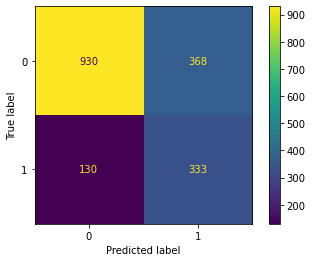

In [63]:
cm_test = confusion_matrix(y_test,y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=lr.classes_)
disp.plot()
plt.show()

In [64]:
from imblearn.under_sampling import RandomUnderSampler

In [65]:
y_train[y_train == 1].shape

(1406,)

In [66]:
rus = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = rus.fit_resample(X_train_scaled, y_train)
display(pd.concat([X_train_under,y_train_under],axis=1).head())
print('Resampled dataset shape %s' % Counter(y_train_under))

,tenure,SeniorCitizen,MonthlyCharges,Churn
0,0.842430,-0.435476,0.313111,0
1,0.720089,-0.435476,1.499197,0
2,1.046330,-0.435476,-0.646101,0
3,-1.074232,-0.435476,-1.478531,0
4,-0.584871,-0.435476,-1.488540,0


Resampled dataset shape Counter({0: 1406, 1: 1406})


In [67]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_under, y_train_under)
y_pred_test = lr.predict(X_test_scaled)

print("The accuracy in the TEST set is: {:.2f}".format(accuracy_score(y_test,y_pred_test)))
print("The precision in the TEST set is: {:.2f}".format(precision_score(y_test,y_pred_test)))
print("The recall in the TEST set is: {:.2f}".format(recall_score(y_test,y_pred_test)))
print("The F1 in the TEST set is: {:.2f}".format(f1_score(y_test,y_pred_test)))

The accuracy in the TEST set is: 0.72
The precision in the TEST set is: 0.47
The recall in the TEST set is: 0.72
The F1 in the TEST set is: 0.57


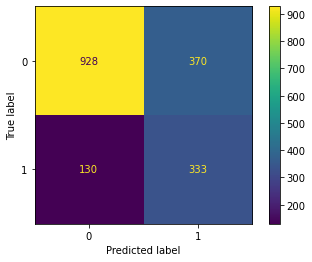

In [68]:
cm_test = confusion_matrix(y_test,y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=lr.classes_)
disp.plot()
plt.show()

In [69]:
from imblearn.over_sampling import SMOTE

In [74]:
sm = SMOTE(random_state=100,k_neighbors=3)
X_train_SMOTE,y_train_SMOTE = sm.fit_resample(X_train_scaled,y_train)

In [75]:
print(X_train.shape)
print(X_train_SMOTE.shape)

(5282, 3)
(7752, 3)


In [76]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_SMOTE, y_train_SMOTE)
y_pred_test = lr.predict(X_test_scaled)

print("The accuracy in the TEST set is: {:.2f}".format(accuracy_score(y_test,y_pred_test)))
print("The precision in the TEST set is: {:.2f}".format(precision_score(y_test,y_pred_test)))
print("The recall in the TEST set is: {:.2f}".format(recall_score(y_test,y_pred_test)))
print("The F1 in the TEST set is: {:.2f}".format(f1_score(y_test,y_pred_test)))

The accuracy in the TEST set is: 0.72
The precision in the TEST set is: 0.48
The recall in the TEST set is: 0.72
The F1 in the TEST set is: 0.57


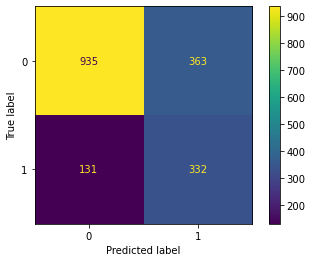

In [77]:
cm_test = confusion_matrix(y_test,y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=lr.classes_)
disp.plot()
plt.show()

In [78]:
from imblearn.under_sampling import TomekLinks 

In [79]:
tl = TomekLinks()
X_train_tl, y_train_tl = tl.fit_resample(X_train_scaled, y_train)
display(pd.concat([X_train_tl,y_train_tl],axis=1).head())
print('Resampled dataset shape %s' % Counter(y_train_tl))

,tenure,SeniorCitizen,MonthlyCharges,Churn
0,-0.340191,-0.435476,-0.514314,0
1,0.883210,2.296336,0.017840,0
2,-1.196572,-0.435476,-0.819594,1
3,1.168670,-0.435476,-1.483535,0
4,-0.829552,-0.435476,0.658427,1


Resampled dataset shape Counter({0: 3516, 1: 1406})


In [80]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_tl, y_train_tl)
pred = lr.predict(X_test_scaled)

print("The accuracy in the TEST set is: {:.2f}".format(accuracy_score(y_test,y_pred_test)))
print("The precision in the TEST set is: {:.2f}".format(precision_score(y_test,y_pred_test)))
print("The recall in the TEST set is: {:.2f}".format(recall_score(y_test,y_pred_test)))
print("The F1 in the TEST set is: {:.2f}".format(f1_score(y_test,y_pred_test)))

The accuracy in the TEST set is: 0.72
The precision in the TEST set is: 0.48
The recall in the TEST set is: 0.72
The F1 in the TEST set is: 0.57
